## 1.Importing Data and Understanding it.

The datset can be found here.
<nav>
<a href="https://www.un.org/en/development/desa/population/migration/data/index.asp"> United Nations (UN) International Migration Data 2020 </a>

In [251]:
# Importing libraries
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

In [344]:
# Reading data file.
df = pd.read_excel('UN_MigrantStockByOriginAndDestination_2019 (1).xlsx',sheet_name='Table 1',
                   skiprows=range(15))
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Total,Other South,Other North,Afghanistan,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,1990,1990001,WORLD,NaN,900.0,NaN,153011473,6548526,2366800,6823350,...,237486,1428020,5060,185946,1237873,6484,168239,455492,85203,204365
1,1990,1990002,UN development groups,NaN,NaN,NaN,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,1990,1990003,More developed regions,b,901.0,NaN,82767216,3385103,1077179,119386,...,56838,1078563,1017,114991,1085310,884,333,11457,26062,40957
3,1990,1990004,Less developed regions,c,902.0,NaN,70244257,3163423,1289621,6703964,...,180648,349457,4043,70955,152563,5600,167906,444035,59141,163408
4,1990,1990005,Least developed countries,d,941.0,NaN,11060221,482753,239756,0,...,286,2027,9,2510,71579,0,0,357,26254,75122


In [345]:
df.shape

(1981, 241)

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1981 entries, 0 to 1980
Columns: 241 entries, Unnamed: 0 to Zimbabwe
dtypes: float64(1), int64(2), object(238)
memory usage: 3.6+ MB


---
---

## 2.Data Cleaning.

In [347]:
# Renaming and dropping the columns.
df.rename(columns={'Unnamed: 0':'Year', 'Unnamed: 2':'Area of destination'}, inplace=True)
df.drop(['Unnamed: 1','Unnamed: 3','Unnamed: 4','Unnamed: 5', 'Other South', 'Other North'], 
        axis=1, inplace=True)
df.head()

,Year,Area of destination,Total,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,1990,WORLD,153011473,6823350,180284,921727,2041,3792,824942,2047,...,237486,1428020,5060,185946,1237873,6484,168239,455492,85203,204365
1,1990,UN development groups,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,1990,More developed regions,82767216,119386,177986,867015,1027,3737,167381,540,...,56838,1078563,1017,114991,1085310,884,333,11457,26062,40957
3,1990,Less developed regions,70244257,6703964,2298,54712,1014,55,657561,1507,...,180648,349457,4043,70955,152563,5600,167906,444035,59141,163408
4,1990,Least developed countries,11060221,0,0,5622,0,0,608108,0,...,286,2027,9,2510,71579,0,0,357,26254,75122


In [348]:
df.isnull().sum().sort_values()

Year                              0
Area of destination               0
Total                             8
United States of America        503
United Kingdom                  620
                               ... 
Isle of Man                    1586
Falkland Islands (Malvinas)    1589
Channel Islands                1589
Holy See                       1593
Mayotte                        1603
Length: 235, dtype: int64

<div class="alert alert-block alert-info">
<b> These missing NaN values mean that either there was no data available or there was no immigration from particular countries to Area of destination, therefore in both of the cases it can be replaced with 0. </div>

In [349]:
# To see if our inference above is right. 
df[df['Area of destination']=='United States of America']

,Year,Area of destination,Total,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
282,1990,United States of America,23251026,28444,5627,4629,NaN,NaN,2252,NaN,...,20766,14633,NaN,42119,543262,NaN,NaN,4933,2954,4767
565,1995,United States of America,28451053,37312,22440,7859,NaN,NaN,3352,NaN,...,23208,19082,NaN,75572,775967,NaN,NaN,12232,4529,7829
848,2000,United States of America,34814053,46342,39644,11158,NaN,NaN,4475,NaN,...,25673,23613,NaN,109748,1013266,NaN,NaN,19697,6139,10957
1131,2005,United States of America,39258293,51965,54825,12680,NaN,NaN,7294,NaN,...,37981,26322,NaN,142706,1106433,NaN,NaN,27207,11649,27363
1414,2010,United States of America,44183643,59330,72085,14633,NaN,NaN,10411,NaN,...,51776,29911,NaN,180905,1236000,NaN,NaN,35748,17662,45037
1697,2015,United States of America,48178877,74106,91865,19633,NaN,NaN,14068,NaN,...,52070,61204,NaN,236264,1300575,NaN,NaN,45642,24856,55463
1980,2019,United States of America,50661149,80026,99205,21201,NaN,NaN,15192,NaN,...,56230,66093,NaN,255141,1368746,NaN,NaN,49289,26841,59895


In [350]:
df[df['Area of destination']=='Yemen']

,Year,Area of destination,Total,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
104,1990,Yemen,118863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,706,NaN,NaN,NaN,NaN,NaN
387,1995,Yemen,136515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
670,2000,Yemen,144940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN
953,2005,Yemen,171871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1236,2010,Yemen,288394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN
1519,2015,Yemen,379882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN
1802,2019,Yemen,385628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15,NaN,NaN,NaN,NaN,NaN


In [351]:
# To fill NaN with 0. 
df=df.fillna(0)

In [352]:
df[df['Area of destination']=='Yemen']

,Year,Area of destination,Total,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
104,1990,Yemen,118863,0,0,0,0,0,0,0,...,0,0,0,0,706,0,0,0,0,0
387,1995,Yemen,136515,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
670,2000,Yemen,144940,0,0,0,0,0,0,0,...,0,0,0,0,9,0,0,0,0,0
953,2005,Yemen,171871,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1236,2010,Yemen,288394,0,0,0,0,0,0,0,...,0,0,0,0,28,0,0,0,0,0
1519,2015,Yemen,379882,0,0,0,0,0,0,0,...,0,0,0,0,15,0,0,0,0,0
1802,2019,Yemen,385628,0,0,0,0,0,0,0,...,0,0,0,0,15,0,0,0,0,0


---
---

## 3.Data Visualization.

### **Q1. Wether the overall trend of immigration to Germany from 1990 to 2019 has been of increasing or decreasing nature?**

In [353]:
# Let's seperate data related to 'Germany'.
df_Germany=df[df['Area of destination']=='Germany']
df_Germany

,Year,Area of destination,Total,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
271,1990,Germany,5936181,33279,5211,8493,0,0,0,0,...,830,2864,0,1662,69594,0,0,991,303,0
554,1995,Germany,7464406,51537,8303,12366,0,0,0,0,...,782,9029,0,2306,75465,0,0,1342,342,0
837,2000,Germany,8992631,69794,11394,16238,0,0,0,0,...,733,15193,0,2950,81335,0,0,1693,381,0
1120,2005,Germany,9402447,75824,13162,17681,0,0,0,0,...,1839,25587,0,5362,86970,0,0,2049,581,0
1403,2010,Germany,9812263,80611,14597,18828,0,0,0,0,...,2759,34199,0,7362,91388,0,0,2340,747,0
1686,2015,Germany,10220418,83992,15209,19617,0,0,0,0,...,2875,35633,0,7671,95221,0,0,2438,848,0
1969,2019,Germany,13132146,208732,50894,21519,0,0,0,0,...,3153,39088,0,8414,104454,0,0,4100,930,0


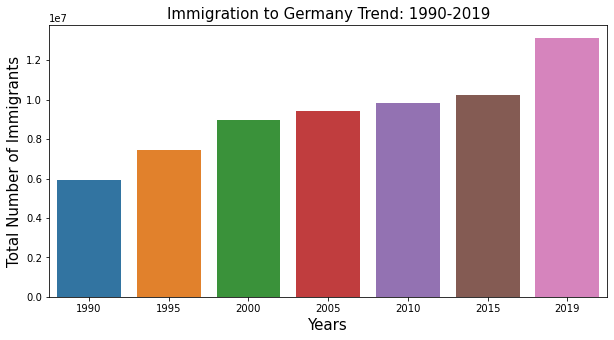

In [354]:
plt.figure(figsize=(10,5))
sns.barplot(x='Year', y='Total', data=df_Germany)
plt.title('Immigration to Germany Trend: 1990-2019', size=15)
plt.ylabel('Total Number of Immigrants', size=15)
plt.xlabel('Years', size=15)
plt.show()

<div class="alert alert-block alert-info">
<b> There is an overall increasing trend but there is a sharp increase from 2015 to 2019. Through a predictive model, perhaps, we could also predict the number of immigrants in 2022 and 2023.</div>

### **Q2. Which Countries contributed the most towards immigration to Germany from 1990 to 2019?**

In [265]:
# Let's make 'Year' as our index because of all the unique values.
df_Germany.set_index('Year', inplace=True)
df_Germany

,Area of destination,Total,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1990,Germany,5936181,33279,5211,8493,0,0,0,0,0,...,830,2864,0,1662,69594,0,0,991,303,0
1995,Germany,7464406,51537,8303,12366,0,0,0,0,0,...,782,9029,0,2306,75465,0,0,1342,342,0
2000,Germany,8992631,69794,11394,16238,0,0,0,0,0,...,733,15193,0,2950,81335,0,0,1693,381,0
2005,Germany,9402447,75824,13162,17681,0,0,0,0,0,...,1839,25587,0,5362,86970,0,0,2049,581,0
2010,Germany,9812263,80611,14597,18828,0,0,0,0,0,...,2759,34199,0,7362,91388,0,0,2340,747,0
2015,Germany,10220418,83992,15209,19617,0,0,0,0,0,...,2875,35633,0,7671,95221,0,0,2438,848,0
2019,Germany,13132146,208732,50894,21519,0,0,0,0,0,...,3153,39088,0,8414,104454,0,0,4100,930,0


In [266]:
#Taking transpose of the above dataframe. 
df_Germany=df_Germany.T

In [267]:
df_Germany

Year,1990,1995,2000,2005,2010,2015,2019
Area of destination,Germany,Germany,Germany,Germany,Germany,Germany,Germany
Total,5936181,7464406,8992631,9402447,9812263,10220418,13132146
Afghanistan,33279,51537,69794,75824,80611,83992,208732
Albania,5211,8303,11394,13162,14597,15209,50894
Algeria,8493,12366,16238,17681,18828,19617,21519
...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0,0,0,0,0,0,0
Western Sahara,0,0,0,0,0,0,0
Yemen,991,1342,1693,2049,2340,2438,4100
Zambia,303,342,381,581,747,848,930


In [268]:
# Summing immigrants by Country and adding them in new column. 
df_Germany['Total_Immigrants_by_Country'] = df_Germany.sum(axis=1)
df_Germany

Year,1990,1995,2000,2005,2010,2015,2019,Total_Immigrants_by_Country
Area of destination,Germany,Germany,Germany,Germany,Germany,Germany,Germany,GermanyGermanyGermanyGermanyGermanyGermanyGermany
Total,5936181,7464406,8992631,9402447,9812263,10220418,13132146,64960492
Afghanistan,33279,51537,69794,75824,80611,83992,208732,603769
Albania,5211,8303,11394,13162,14597,15209,50894,118770
Algeria,8493,12366,16238,17681,18828,19617,21519,114742
...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0,0,0,0,0,0,0,0
Western Sahara,0,0,0,0,0,0,0,0
Yemen,991,1342,1693,2049,2340,2438,4100,14953
Zambia,303,342,381,581,747,848,930,4132


In [269]:
# Removing "Area of destination" and 'Total' row, because the dataframe belongs to 'Germany' and total
# trend has already been seen above. 
df_Germany.drop(df_Germany.index[0], inplace=True)
df_Germany.drop(df_Germany.index[0], inplace=True)
df_Germany

Year,1990,1995,2000,2005,2010,2015,2019,Total_Immigrants_by_Country
Afghanistan,33279,51537,69794,75824,80611,83992,208732,603769
Albania,5211,8303,11394,13162,14597,15209,50894,118770
Algeria,8493,12366,16238,17681,18828,19617,21519,114742
American Samoa,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0,0,0,0,0,0,0,0
Western Sahara,0,0,0,0,0,0,0,0
Yemen,991,1342,1693,2049,2340,2438,4100,14953
Zambia,303,342,381,581,747,848,930,4132


In [270]:
# Let's see top countries from where people migrated to Germany. 
df_Germany.sort_values(by='Total_Immigrants_by_Country', ascending=False, axis=0, inplace=True)

In [271]:
df_Germany.head(10)

Year,1990,1995,2000,2005,2010,2015,2019,Total_Immigrants_by_Country
Turkey,1586121,1617880,1649639,1483727,1320171,1370193,1531333,10559064
Poland,248610,459633,670656,1157821,1535428,1592694,1784839,7449681
Russian Federation,77318,490548,903777,889324,861106,893657,999162,5114892
Kazakhstan,10199,248645,487090,671031,816137,848587,940296,4021985
Italy,486516,492300,498084,410250,335329,349395,578841,3150715
Romania,176920,249921,322922,407829,477488,497518,545759,2678357
Serbia,428334,512812,597290,319713,86303,89923,166432,2200807
Greece,337546,345405,353263,256149,173992,181290,326297,1973942
Czechia,27873,64364,100855,285873,439737,458182,502609,1879493
Austria,189349,185418,181487,196503,208395,217137,238191,1416480


In [272]:
Top_10_Overall=df_Germany.head(10).T
Top_10_Overall

,Turkey,Poland,Russian Federation,Kazakhstan,Italy,Romania,Serbia,Greece,Czechia,Austria
Year,,,,,,,,,,
1990,1586121,248610,77318,10199,486516,176920,428334,337546,27873,189349
1995,1617880,459633,490548,248645,492300,249921,512812,345405,64364,185418
2000,1649639,670656,903777,487090,498084,322922,597290,353263,100855,181487
2005,1483727,1157821,889324,671031,410250,407829,319713,256149,285873,196503
2010,1320171,1535428,861106,816137,335329,477488,86303,173992,439737,208395
2015,1370193,1592694,893657,848587,349395,497518,89923,181290,458182,217137
2019,1531333,1784839,999162,940296,578841,545759,166432,326297,502609,238191
Total_Immigrants_by_Country,10559064,7449681,5114892,4021985,3150715,2678357,2200807,1973942,1879493,1416480


In [273]:
#Let's drop the last row and see overall trend from 1990 to 2019.
Top_10_Overall.drop('Total_Immigrants_by_Country', axis=0, inplace=True)

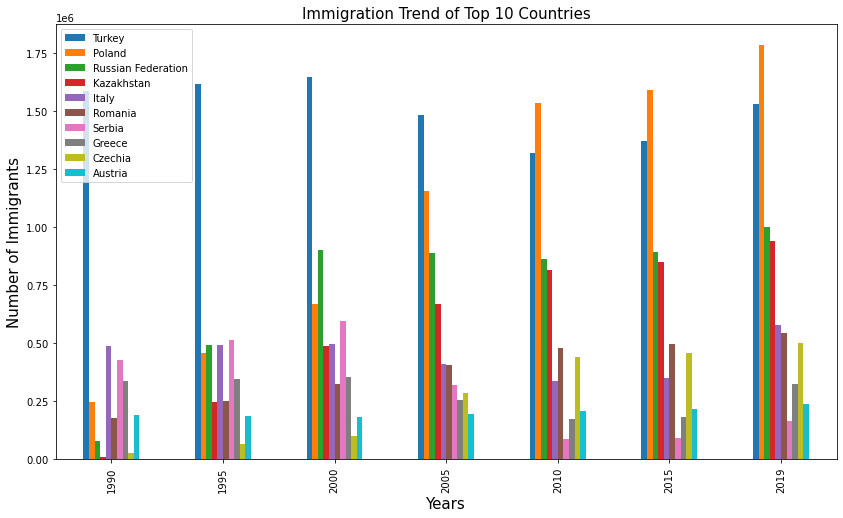

In [274]:
Top_10_Overall.plot(kind='bar', figsize=(14, 8)) # pass a tuple (x, y) size
plt.title('Immigration Trend of Top 10 Countries', size=15)
plt.ylabel('Number of Immigrants', size=15)
plt.xlabel('Years', size=15)
plt.show()

### **Q3. What countries contributed the least towards immigration to Germany from 1990 to 2019?**

In [275]:
# Let's see the countries from where there were no people who migrated to Germany. 
df_Germany.sort_values(by='Total_Immigrants_by_Country', ascending=True, axis=0, inplace=True)

In [276]:
df_Germany.head(10)

Year,1990,1995,2000,2005,2010,2015,2019,Total_Immigrants_by_Country
Zimbabwe,0,0,0,0,0,0,0,0
Sudan,0,0,0,0,0,0,0,0
State of Palestine,0,0,0,0,0,0,0,0
Vanuatu,0,0,0,0,0,0,0,0
South Sudan,0,0,0,0,0,0,0,0
Solomon Islands,0,0,0,0,0,0,0,0
Western Sahara,0,0,0,0,0,0,0,0
Sint Maarten (Dutch part),0,0,0,0,0,0,0,0
Seychelles,0,0,0,0,0,0,0,0
British Virgin Islands,0,0,0,0,0,0,0,0


In [277]:
# Let's remove the countries from where there were no Immigrants. 
#We are interested in least, not zero number of Immigrants. 
filt1=df_Germany.drop(df_Germany[df_Germany['Total_Immigrants_by_Country'] == 0].index )#, inplace = True)
Bottom_10_Overall=pd.DataFrame(filt1)
Bottom_10_Overall

Year,1990,1995,2000,2005,2010,2015,2019,Total_Immigrants_by_Country
Liechtenstein,35,99,163,209,248,258,283,1295
Gabon,123,182,241,340,422,440,482,2230
Chad,265,281,297,275,256,267,758,2399
Panama,207,237,267,446,594,618,677,3046
Burundi,233,331,429,504,566,590,647,3300
...,...,...,...,...,...,...,...,...
Italy,486516,492300,498084,410250,335329,349395,578841,3150715
Kazakhstan,10199,248645,487090,671031,816137,848587,940296,4021985
Russian Federation,77318,490548,903777,889324,861106,893657,999162,5114892
Poland,248610,459633,670656,1157821,1535428,1592694,1784839,7449681


In [278]:
#Let's drop the last row and see overall trend from 1990 to 2019.
Bottom_10_Overall.drop('Total_Immigrants_by_Country', axis=1, inplace=True)

In [279]:
Bottom_10_Overall.head(10)

Year,1990,1995,2000,2005,2010,2015,2019
Liechtenstein,35,99,163,209,248,258,283
Gabon,123,182,241,340,422,440,482
Chad,265,281,297,275,256,267,758
Panama,207,237,267,446,594,618,677
Burundi,233,331,429,504,566,590,647
Malta,246,295,344,489,608,633,694
Zambia,303,342,381,581,747,848,930
Trinidad and Tobago,354,404,454,611,741,773,847
Niger,223,519,814,788,764,795,1136
El Salvador,524,504,483,807,1077,1122,1230


In [280]:
Bottom_10_Overall= Bottom_10_Overall.head(10).T

In [281]:
Bottom_10_Overall

,Liechtenstein,Gabon,Chad,Panama,Burundi,Malta,Zambia,Trinidad and Tobago,Niger,El Salvador
Year,,,,,,,,,,
1990,35,123,265,207,233,246,303,354,223,524
1995,99,182,281,237,331,295,342,404,519,504
2000,163,241,297,267,429,344,381,454,814,483
2005,209,340,275,446,504,489,581,611,788,807
2010,248,422,256,594,566,608,747,741,764,1077
2015,258,440,267,618,590,633,848,773,795,1122
2019,283,482,758,677,647,694,930,847,1136,1230


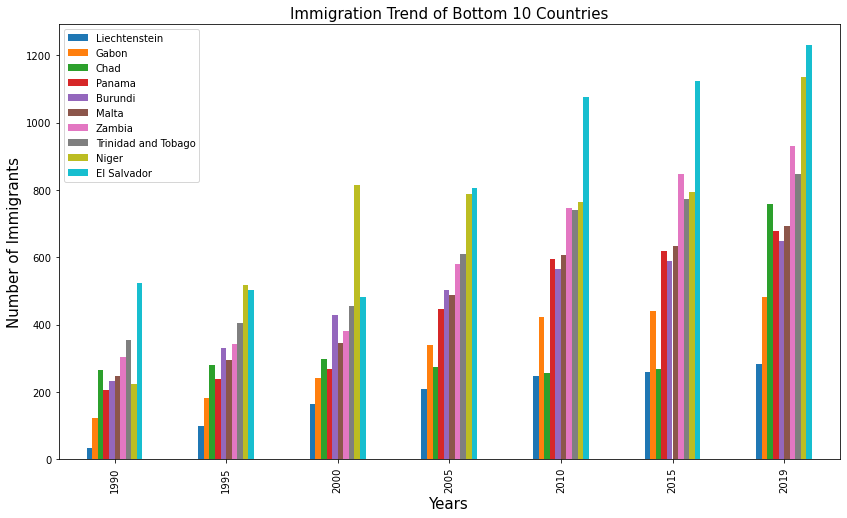

In [282]:
Bottom_10_Overall.plot(kind='bar', figsize=(14, 8)) # pass a tuple (x, y) size
plt.title('Immigration Trend of Bottom 10 Countries', size=15)
plt.ylabel('Number of Immigrants', size=15)
plt.xlabel('Years', size=15)
plt.show()

### **Q4. What is the effect of Syrian Civil war towards immigration to Germany from 1990 to 2019?**

In [283]:
df_Syria=pd.DataFrame(df_Germany.loc['Syrian Arab Republic'])
df_Syria

,Syrian Arab Republic
Year,
1990,15330
1995,20223
2000,25116
2005,34895
2010,42959
2015,44761
2019,589628
Total_Immigrants_by_Country,772912


In [284]:
df_Syria.drop('Total_Immigrants_by_Country', inplace=True)
df_Syria.reset_index(inplace=True)
df_Syria

,Year,Syrian Arab Republic
0,1990,15330
1,1995,20223
2,2000,25116
3,2005,34895
4,2010,42959
5,2015,44761
6,2019,589628


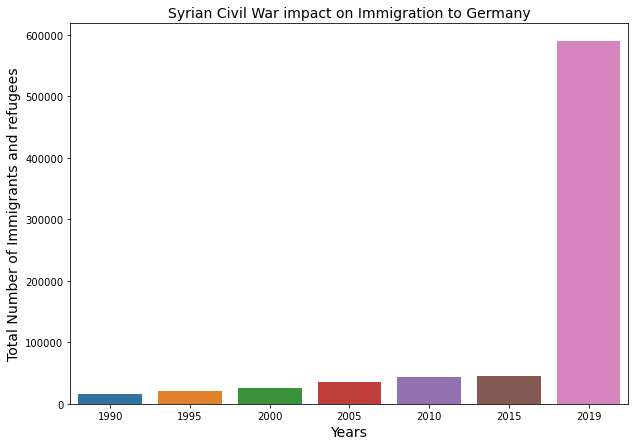

In [285]:
plt.figure(figsize=(10,7))
sns.barplot(x='Year', y='Syrian Arab Republic', data=df_Syria)
plt.title('Syrian Civil War impact on Immigration to Germany', size=14)
plt.ylabel('Total Number of Immigrants and refugees', size=14)
plt.xlabel('Years', size=14)
plt.show()

<div class="alert alert-block alert-info">
<b> There is exponential increase from 2015 to 2019. This can be related to refugees who left Syria due to civil war which broke out in 2011 and in later years it got worse. Refugees were welcomed and accepted by German authorities.</div>

### **Q5. What is the trend of Pakistanis moving to Germany?**

In [286]:
df_Pak=pd.DataFrame(df_Germany.loc['Pakistan'])
df_Pak

,Pakistan
Year,
1990,26620
1995,31202
2000,35783
2005,38473
2010,40592
2015,42295
2019,66033
Total_Immigrants_by_Country,280998


In [287]:
df_Pak.drop('Total_Immigrants_by_Country', inplace=True)
df_Pak.reset_index(inplace=True)
df_Pak

,Year,Pakistan
0,1990,26620
1,1995,31202
2,2000,35783
3,2005,38473
4,2010,40592
5,2015,42295
6,2019,66033


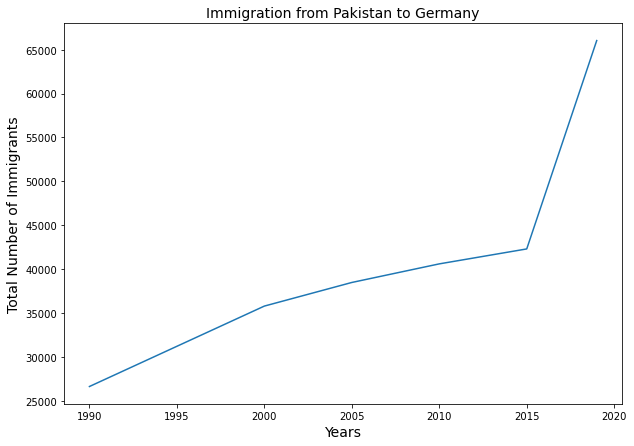

In [288]:
plt.figure(figsize=(10,7))
sns.lineplot(x='Year', y='Pakistan', data=df_Pak)
plt.title('Immigration from Pakistan to Germany', size=14)
plt.ylabel('Total Number of Immigrants', size=14)
plt.xlabel('Years', size=14)
plt.show()

### **Q6. What is the trend of Immigration to Germany from India and China in comparison with Pakistan?**

In [289]:
I_C_P=pd.DataFrame(df_Germany.loc[['India', 'China', 'Pakistan']])
I_C_P

Year,1990,1995,2000,2005,2010,2015,2019,Total_Immigrants_by_Country
India,31877,32944,34011,45659,55250,57568,89704,347013
China,19834,34512,49190,67622,82817,86291,119093,459359
Pakistan,26620,31202,35783,38473,40592,42295,66033,280998


In [290]:
I_C_P=I_C_P.T
I_C_P

,India,China,Pakistan
Year,,,
1990,31877,19834,26620
1995,32944,34512,31202
2000,34011,49190,35783
2005,45659,67622,38473
2010,55250,82817,40592
2015,57568,86291,42295
2019,89704,119093,66033
Total_Immigrants_by_Country,347013,459359,280998


In [291]:
I_C_P.drop('Total_Immigrants_by_Country', inplace=True)
I_C_P

,India,China,Pakistan
Year,,,
1990,31877,19834,26620
1995,32944,34512,31202
2000,34011,49190,35783
2005,45659,67622,38473
2010,55250,82817,40592
2015,57568,86291,42295
2019,89704,119093,66033


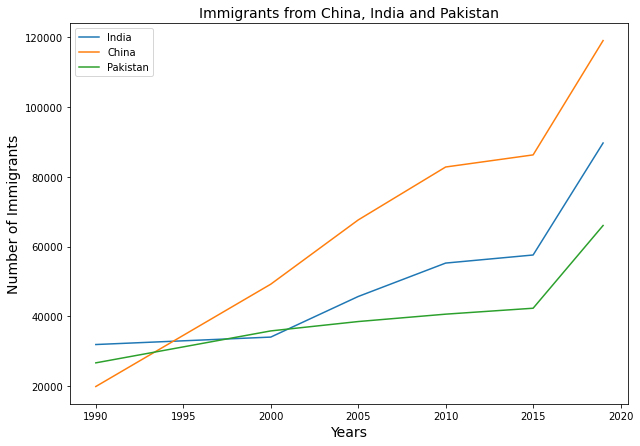

In [292]:
I_C_P.plot(kind='line', figsize=(10,7))
plt.title('Immigrants from China, India and Pakistan', size=14)
plt.ylabel('Number of Immigrants', size=14)
plt.xlabel('Years', size=14)
plt.show()

<div class="alert alert-block alert-info">
<b> There is an overall similar growing trend but more people in numbers have moved from China. </div>

### **Q7. Which least and most popular countries did people from Germany move to, that is, the trend of immigration from Germany to other countries in 2019?**

In [293]:
# We will start from our main dataframe.
df.head()

,Year,Area of destination,Total,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,1990,WORLD,153011473,6823350,180284,921727,2041,3792,824942,2047,...,237486,1428020,5060,185946,1237873,6484,168239,455492,85203,204365
1,1990,UN development groups,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,1990,More developed regions,82767216,119386,177986,867015,1027,3737,167381,540,...,56838,1078563,1017,114991,1085310,884,333,11457,26062,40957
3,1990,Less developed regions,70244257,6703964,2298,54712,1014,55,657561,1507,...,180648,349457,4043,70955,152563,5600,167906,444035,59141,163408
4,1990,Least developed countries,11060221,0,0,5622,0,0,608108,0,...,286,2027,9,2510,71579,0,0,357,26254,75122


In [294]:
# Let's take these columns out and make a new dataframe. 
From_Germany=pd.DataFrame(df[['Year', 'Area of destination', 'Germany']])
From_Germany

,Year,Area of destination,Germany
0,1990,WORLD,2929448
1,1990,UN development groups,..
2,1990,More developed regions,2488935
3,1990,Less developed regions,440513
4,1990,Least developed countries,4776
...,...,...,...
1976,2019,Bermuda,251
1977,2019,Canada,155330
1978,2019,Greenland,53
1979,2019,Saint Pierre and Miquelon,0


In [295]:
# To check if any missing values are there
From_Germany.isnull().sum().sort_values()

Year                   0
Area of destination    0
Germany                0
dtype: int64

In [296]:
From_Germany.dtypes

Year                    int64
Area of destination    object
Germany                object
dtype: object

In [297]:
# To see invalid parsing. 
print (From_Germany[pd.to_numeric(df.Germany, errors='coerce').isnull()]) 

      Year                         Area of destination Germany
1     1990                       UN development groups      ..
6     1990                    World Bank income groups      ..
13    1990                          Geographic regions      ..
20    1990  Sustainable Development Goal (SDG) regions      ..
284   1995                       UN development groups      ..
289   1995                    World Bank income groups      ..
296   1995                          Geographic regions      ..
303   1995  Sustainable Development Goal (SDG) regions      ..
567   2000                       UN development groups      ..
572   2000                    World Bank income groups      ..
579   2000                          Geographic regions      ..
586   2000  Sustainable Development Goal (SDG) regions      ..
850   2005                       UN development groups      ..
855   2005                    World Bank income groups      ..
862   2005                          Geographic regions 

In [298]:
# To replace those invalid strings with numeric value 0. 
From_Germany['Germany'].replace('..', 0, inplace=True)

In [299]:
# Let's check again. 
print (From_Germany[pd.to_numeric(df.Germany, errors='coerce').isnull()]) 

      Year                         Area of destination  Germany
1     1990                       UN development groups        0
6     1990                    World Bank income groups        0
13    1990                          Geographic regions        0
20    1990  Sustainable Development Goal (SDG) regions        0
284   1995                       UN development groups        0
289   1995                    World Bank income groups        0
296   1995                          Geographic regions        0
303   1995  Sustainable Development Goal (SDG) regions        0
567   2000                       UN development groups        0
572   2000                    World Bank income groups        0
579   2000                          Geographic regions        0
586   2000  Sustainable Development Goal (SDG) regions        0
850   2005                       UN development groups        0
855   2005                    World Bank income groups        0
862   2005                          Geog

In [300]:
# Converting 'Germany' column to nemeric data type.
From_Germany['Germany'] = pd.to_numeric(From_Germany['Germany'])

In [301]:
From_Germany.dtypes

Year                    int64
Area of destination    object
Germany                 int64
dtype: object

In [302]:
From_Germany.sort_values(by='Germany', ascending=False)

,Year,Area of destination,Germany
1698,2019,WORLD,4014203
1415,2015,WORLD,3756136
1132,2010,WORLD,3727333
849,2005,WORLD,3446260
1700,2019,More developed regions,3365059
...,...,...,...
1320,2010,French Guiana,0
1321,2010,Guyana,0
732,2000,Saint Vincent and the Grenadines,0
1324,2010,Suriname,0


In [303]:
# Let's drop where values are zero.
From_Germany.drop(From_Germany[From_Germany['Germany'] == 0].index, inplace = True)

In [304]:
From_Germany['Area of destination'].unique()

array(['WORLD', 'More developed regions', 'Less developed regions',
       'Least developed countries',
       'Less developed regions, excluding least developed countries',
       'High-income countries', 'Middle-income countries',
       'Upper-middle-income countries', 'Lower-middle-income countries',
       'Low-income countries', 'No income group available', 'Africa',
       'Asia', 'Europe', 'Latin America and the Caribbean',
       'Northern America', 'Oceania', 'SUB-SAHARAN AFRICA',
       'Eastern Africa', 'Mauritius', 'Seychelles', 'Uganda',
       'United Republic of Tanzania', 'Zambia', 'Middle Africa', 'Congo',
       'Gabon', 'Southern Africa', 'Botswana', 'Namibia', 'South Africa',
       'Western Africa', 'Cabo Verde', 'Guinea', 'Liberia', 'Senegal',
       'Sierra Leone', 'Togo', 'NORTHERN AFRICA AND WESTERN ASIA',
       'Northern Africa', 'Algeria', 'Egypt', 'Libya', 'Morocco',
       'Tunisia', 'Western Asia', 'Armenia', 'Azerbaijan', 'Cyprus',
       'Georgia', 'Is

In [305]:
# Creating a list ofcategories present in the data. 
a=['Latin America and the Caribbean', 'LATIN AMERICA AND THE CARIBBEAN', 
   'Eastern Africa', 'Northern Africa','Eastern Europe','Africa', 'SUB-SAHARAN AFRICA', 
   'Southern Africa', 'Eastern Asia', 'Oceania', 'OCEANIA','No income group available', 
   'EASTERN AND SOUTH-EASTERN ASIA',  'South-Eastern Asia', 'Southern Europe', 
   'Upper-middle-income countries', 'Western Europe', 
   'Northern America', 'NORTHERN AMERICA', 'Least developed countries', 'Low-income countries', 
   'WORLD', 'High-income countries', 'Less developed regions', 'Asia', 
   'Less developed regions, excluding least developed countries', 
   'NORTHERN AFRICA AND WESTERN ASIA', 'Western Asia', 
   'Middle-income countries', 'CENTRAL AND SOUTHERN ASIA', 
   'Southern Asia', 'Lower-middle-income countries','More developed regions',  
   'EUROPE AND NORTHERN AMERICA', 'Europe', 'EUROPE', 'Northern Europe']

In [306]:
# We will create two datasets. 
DE_Countrywise=pd.DataFrame(From_Germany[~From_Germany['Area of destination'].isin(a)])
DE_Categorywise=pd.DataFrame(From_Germany[From_Germany['Area of destination'].isin(a)])

In [307]:
DE_Categorywise

,Year,Area of destination,Germany
0,1990,WORLD,2929448
2,1990,More developed regions,2488935
3,1990,Less developed regions,440513
4,1990,Least developed countries,4776
5,1990,"Less developed regions, excluding least develo...",435737
...,...,...,...
1923,2019,Eastern Europe,305129
1934,2019,Northern Europe,500618
1948,2019,Southern Europe,615961
1965,2019,Western Europe,1081348


In [308]:
DE_Countrywise

,Year,Area of destination,Germany
31,1990,Mauritius,57
36,1990,Seychelles,40
39,1990,Uganda,226
40,1990,United Republic of Tanzania,605
41,1990,Zambia,311
...,...,...,...
1974,2019,Switzerland,363037
1976,2019,Bermuda,251
1977,2019,Canada,155330
1978,2019,Greenland,53


In [309]:
DE_Countrywise.groupby([ 'Year', 'Area of destination']).sum().sort_values(by='Germany'
                                                                           , ascending=False)

Germany
Year Area of destination              
2000 United States of America   724649
1995 United States of America   718811
1990 United States of America   711929
2005 United States of America   682498
2010 United States of America   660214
...                                ...
2000 Faroe Islands                  16
1995 Bhutan                         15
     Dominica                       14
1990 Bhutan                         12
     Dominica                       11

[909 rows x 1 columns]

In [310]:
DE_Countrywise.sort_values(by='Germany', ascending=False)

,Year,Area of destination,Germany
848,2000,United States of America,724649
565,1995,United States of America,718811
282,1990,United States of America,711929
1131,2005,United States of America,682498
1414,2010,United States of America,660214
...,...,...,...
806,2000,Faroe Islands,16
398,1995,Bhutan,15
438,1995,Dominica,14
115,1990,Bhutan,12


In [311]:
fil3=DE_Countrywise['Year']== 2019
DE_1=DE_Countrywise.loc[fil3]
DE_1.sort_values(by='Germany', ascending=False, inplace=True)

/Users/AHMAD/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [312]:
Top_5_from_DE=DE_1.iloc[0:5, :]
Top_5_from_DE

,Year,Area of destination,Germany
1980,2019,United States of America,563411
1800,2019,Turkey,371430
1974,2019,Switzerland,363037
1947,2019,United Kingdom,347634
1966,2019,Austria,264081


In [313]:
Top_5_from_DE.set_index('Year', inplace=True)
Top_5_from_DE

,Area of destination,Germany
Year,,
2019,United States of America,563411
2019,Turkey,371430
2019,Switzerland,363037
2019,United Kingdom,347634
2019,Austria,264081


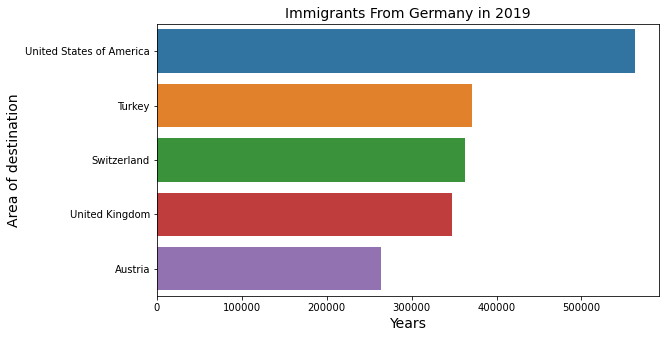

In [314]:
plt.figure(figsize=(9,5))
sns.barplot(y='Area of destination', x='Germany', data=Top_5_from_DE)
plt.title('Immigrants From Germany in 2019', size=14)
plt.ylabel('Area of destination', size=14)
plt.xlabel('Years', size=14)
plt.show()

<div class="alert alert-block alert-info">
<b> USA was the most popular destination in 2019 for the people from Germany . </div>

In [315]:
DE_1.tail(10)

,Year,Area of destination,Germany
1978,2019,Greenland,53
1863,2019,Saint Lucia,48
1959,2019,North Macedonia,42
1831,2019,Cambodia,40
1916,2019,Samoa,35
1773,2019,Sierra Leone,34
1853,2019,Dominica,30
1813,2019,Bhutan,28
1938,2019,Faroe Islands,28
1764,2019,Guinea,25


<div class="alert alert-block alert-info">
<b> Above were the least popular destinations in 2019 for the people from Germany . </div>

### **Q8. Which least and most popular countries did people from Pakistan move to, that is, the trend of immigration from Pakistan to other countries in 2019?**

In [316]:
From_Pak=df[['Year', 'Area of destination', 'Pakistan']]
From_Pak

,Year,Area of destination,Pakistan
0,1990,WORLD,3343328
1,1990,UN development groups,..
2,1990,More developed regions,447344
3,1990,Less developed regions,2895984
4,1990,Least developed countries,17315
...,...,...,...
1976,2019,Bermuda,37
1977,2019,Canada,215409
1978,2019,Greenland,0
1979,2019,Saint Pierre and Miquelon,0


In [317]:
From_Pak.isnull().sum().sort_values()

Year                   0
Area of destination    0
Pakistan               0
dtype: int64

In [318]:
From_Pak.dtypes

Year                    int64
Area of destination    object
Pakistan               object
dtype: object

In [319]:
# To see invalid parsing. 
print (From_Pak[pd.to_numeric(df.Pakistan, errors='coerce').isnull()]) 

      Year                         Area of destination Pakistan
1     1990                       UN development groups       ..
6     1990                    World Bank income groups       ..
13    1990                          Geographic regions       ..
20    1990  Sustainable Development Goal (SDG) regions       ..
284   1995                       UN development groups       ..
289   1995                    World Bank income groups       ..
296   1995                          Geographic regions       ..
303   1995  Sustainable Development Goal (SDG) regions       ..
567   2000                       UN development groups       ..
572   2000                    World Bank income groups       ..
579   2000                          Geographic regions       ..
586   2000  Sustainable Development Goal (SDG) regions       ..
850   2005                       UN development groups       ..
855   2005                    World Bank income groups       ..
862   2005                          Geog

In [320]:
# To replace those invalid strings with numeric value 0. 
From_Pak['Pakistan'].replace('..', 0, inplace=True)

/Users/AHMAD/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [321]:
# Let's check again. 
print (From_Pak[pd.to_numeric(df.Pakistan, errors='coerce').isnull()]) 

      Year                         Area of destination  Pakistan
1     1990                       UN development groups         0
6     1990                    World Bank income groups         0
13    1990                          Geographic regions         0
20    1990  Sustainable Development Goal (SDG) regions         0
284   1995                       UN development groups         0
289   1995                    World Bank income groups         0
296   1995                          Geographic regions         0
303   1995  Sustainable Development Goal (SDG) regions         0
567   2000                       UN development groups         0
572   2000                    World Bank income groups         0
579   2000                          Geographic regions         0
586   2000  Sustainable Development Goal (SDG) regions         0
850   2005                       UN development groups         0
855   2005                    World Bank income groups         0
862   2005               

In [322]:
# Converting 'Pakistan' column to nemeric data type.
From_Pak['Pakistan'] = pd.to_numeric(From_Pak['Pakistan'])

/var/folders/jk/drml9bhs2jj1drgwwtwshb740000gn/T/ipykernel_1245/1302614529.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [323]:
From_Pak.dtypes

Year                    int64
Area of destination    object
Pakistan                int64
dtype: object

In [324]:
From_Pak.sort_values(by='Pakistan', ascending=False)

,Year,Area of destination,Pakistan
1698,2019,WORLD,6303286
1415,2015,WORLD,5910360
1132,2010,WORLD,4992279
1705,2019,High-income countries,4943224
1701,2019,Less developed regions,4804846
...,...,...,...
1175,2010,Middle Africa,0
1176,2010,Angola,0
1177,2010,Cameroon,0
1178,2010,Central African Republic,0


In [325]:
# Let's drop where values are zero.
From_Pak.drop(From_Pak[From_Pak['Pakistan'] == 0].index, inplace = True)

/Users/AHMAD/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [326]:
# We will create two datasets. 
PK_Countrywise=pd.DataFrame(From_Pak[~From_Pak['Area of destination'].isin(a)])
PK_Categorywise=pd.DataFrame(From_Pak[From_Pak['Area of destination'].isin(a)])

In [327]:
PK_Countrywise

,Year,Area of destination,Pakistan
31,1990,Mauritius,1
33,1990,Mozambique,516
36,1990,Seychelles,23
39,1990,Uganda,216
40,1990,United Republic of Tanzania,407
...,...,...,...
1973,2019,Netherlands,13559
1974,2019,Switzerland,5387
1976,2019,Bermuda,37
1977,2019,Canada,215409


In [328]:
PK_Categorywise

,Year,Area of destination,Pakistan
0,1990,WORLD,3343328
2,1990,More developed regions,447344
3,1990,Less developed regions,2895984
4,1990,Least developed countries,17315
5,1990,"Less developed regions, excluding least develo...",2878669
...,...,...,...
1923,2019,Eastern Europe,3068
1934,2019,Northern Europe,672724
1948,2019,Southern Europe,178834
1965,2019,Western Europe,130061


In [329]:
PK_Countrywise.sort_values(by='Pakistan', ascending=False)

,Year,Area of destination,Pakistan
116,1990,India,1921278
399,1995,India,1637255
1797,2019,Saudi Arabia,1447071
682,2000,India,1353231
965,2005,India,1250307
...,...,...,...
798,2000,Romania,1
515,1995,Romania,1
1863,2019,Saint Lucia,1
232,1990,Romania,1


In [330]:
fil4=PK_Countrywise['Year']== 2019
PK_1=PK_Countrywise.loc[fil4]
PK_1.sort_values(by='Pakistan', ascending=False, inplace=True)

/Users/AHMAD/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [331]:
Top_5_from_PK=PK_1.iloc[0:5, :]
Top_5_from_PK

,Year,Area of destination,Pakistan
1797,2019,Saudi Arabia,1447071
1814,2019,India,1082917
1801,2019,United Arab Emirates,981536
1947,2019,United Kingdom,605016
1980,2019,United States of America,406509


In [332]:
Top_5_from_PK.set_index('Year', inplace=True)
Top_5_from_PK

,Area of destination,Pakistan
Year,,
2019,Saudi Arabia,1447071
2019,India,1082917
2019,United Arab Emirates,981536
2019,United Kingdom,605016
2019,United States of America,406509


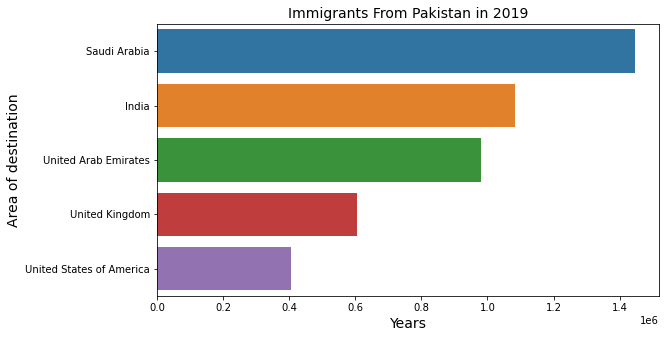

In [333]:
plt.figure(figsize=(9,5))
sns.barplot(y='Area of destination', x='Pakistan', data=Top_5_from_PK)
plt.title('Immigrants From Pakistan in 2019', size=14)
plt.ylabel('Area of destination', size=14)
plt.xlabel('Years', size=14)
plt.show()

<div class="alert alert-block alert-info">
<b> Saudi Arabia was the most popular destination in 2019 for the people from Pakistan . Thousands of Pakistanis migrate for work every year and that is mostly labour migration.</div>

In [334]:
PK_1.tail()

,Year,Area of destination,Pakistan
1892,2019,Venezuela (Bolivarian Republic of),13
1871,2019,Costa Rica,9
1879,2019,Argentina,5
1944,2019,Lithuania,4
1863,2019,Saint Lucia,1


<div class="alert alert-block alert-info">
<b> Above were the least popular destinations in 2019 for the people from Pakistan. </div>

### **Q9. Is there any immigration from other countries to Pakistan? What is the trend?**

In [335]:
# Let's seperate data related to 'Germany'.
df_Pakistan=df[df['Area of destination']=='Pakistan']
df_Pakistan

,Year,Area of destination,Total,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,...,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
120,1990,Pakistan,6208204,3374973,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
403,1995,Pakistan,3669308,1291867,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
686,2000,Pakistan,4181912,2069977,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
969,2005,Pakistan,3171132,1162810,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1252,2010,Pakistan,3941586,1988641,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1535,2015,Pakistan,3506520,1710378,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1818,2019,Pakistan,3257978,1589146,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


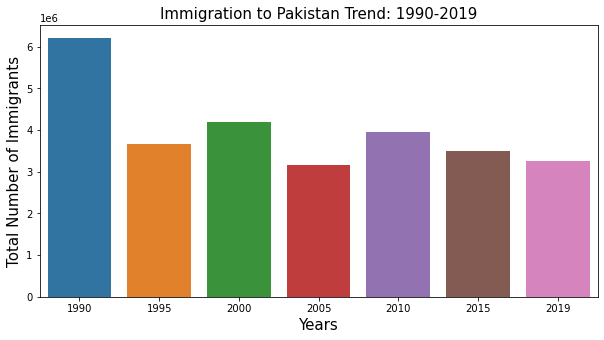

In [336]:
plt.figure(figsize=(10,5))
sns.barplot(x='Year', y='Total', data=df_Pakistan)
plt.title('Immigration to Pakistan Trend: 1990-2019', size=15)
plt.ylabel('Total Number of Immigrants', size=15)
plt.xlabel('Years', size=15)
plt.show()

<div class="alert alert-block alert-info">
<b> Pakistan is a developing country with a semi-industrial economy. Therefore, the trend is not of growth. The other factor could be participation of Pakistan in the war against terror </div>

### **Q10. Is there any effect on immigration to Pakistan due to of War in Afghanstan (2001-2021)?**

In [337]:
df_Pakistan.set_index('Year', inplace=True)
df_Pakistan=df_Pakistan.T
df_Pakistan

Year,1990,1995,2000,2005,2010,2015,2019
Area of destination,Pakistan,Pakistan,Pakistan,Pakistan,Pakistan,Pakistan,Pakistan
Total,6208204,3669308,4181912,3171132,3941586,3506520,3257978
Afghanistan,3374973,1291867,2069977,1162810,1988641,1710378,1589146
Albania,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0,0,0,0,0,0,0
Western Sahara,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0
Zambia,0,0,0,0,0,0,0


In [338]:
df_Pakistan['Total_Immigrants_by_Country'] = df_Pakistan.sum(axis=1)
df_Pakistan

Year,1990,1995,2000,2005,2010,2015,2019,Total_Immigrants_by_Country
Area of destination,Pakistan,Pakistan,Pakistan,Pakistan,Pakistan,Pakistan,Pakistan,PakistanPakistanPakistanPakistanPakistanPakist...
Total,6208204,3669308,4181912,3171132,3941586,3506520,3257978,27936640
Afghanistan,3374973,1291867,2069977,1162810,1988641,1710378,1589146,13187792
Albania,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0,0,0,0,0,0,0,0
Western Sahara,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,0,0,0,0


In [339]:
df_Pakistan.drop(df_Pakistan.index[0], inplace=True)
df_Pakistan.drop(df_Pakistan.index[0], inplace=True)
df_Pakistan

Year,1990,1995,2000,2005,2010,2015,2019,Total_Immigrants_by_Country
Afghanistan,3374973,1291867,2069977,1162810,1988641,1710378,1589146,13187792
Albania,0,0,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,0,0
American Samoa,0,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0,0,0,0,0,0,0,0
Western Sahara,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0
Zambia,0,0,0,0,0,0,0,0


In [340]:
df_Pakistan.sort_values(by='Total_Immigrants_by_Country', ascending=False, axis=0, inplace=True)
df_Pakistan.head(10)

Year,1990,1995,2000,2005,2010,2015,2019,Total_Immigrants_by_Country
India,2818248,2365884,2101039,1998814,1943345,1709217,1588067,14524614
Afghanistan,3374973,1291867,2069977,1162810,1988641,1710378,1589146,13187792
Iran (Islamic Republic of),4108,3060,2940,2381,2345,2301,2137,19272
Myanmar,3598,3000,2662,2551,2479,2460,2285,19035
Sri Lanka,889,413,569,384,663,578,537,4033
Indonesia,599,502,443,423,413,408,379,3167
Iraq,894,466,586,289,287,251,233,3006
China,490,410,363,347,338,334,310,2592
New Zealand,0,0,0,0,0,0,0,0
Niger,0,0,0,0,0,0,0,0


In [341]:
Top_10_Overall=df_Pakistan.head(10).T
Top_10_Overall

,India,Afghanistan,Iran (Islamic Republic of),Myanmar,Sri Lanka,Indonesia,Iraq,China,New Zealand,Niger
Year,,,,,,,,,,
1990,2818248,3374973,4108,3598,889,599,894,490,0,0
1995,2365884,1291867,3060,3000,413,502,466,410,0,0
2000,2101039,2069977,2940,2662,569,443,586,363,0,0
2005,1998814,1162810,2381,2551,384,423,289,347,0,0
2010,1943345,1988641,2345,2479,663,413,287,338,0,0
2015,1709217,1710378,2301,2460,578,408,251,334,0,0
2019,1588067,1589146,2137,2285,537,379,233,310,0,0
Total_Immigrants_by_Country,14524614,13187792,19272,19035,4033,3167,3006,2592,0,0


In [342]:
Top_10_Overall.drop('Total_Immigrants_by_Country', axis=0, inplace=True)

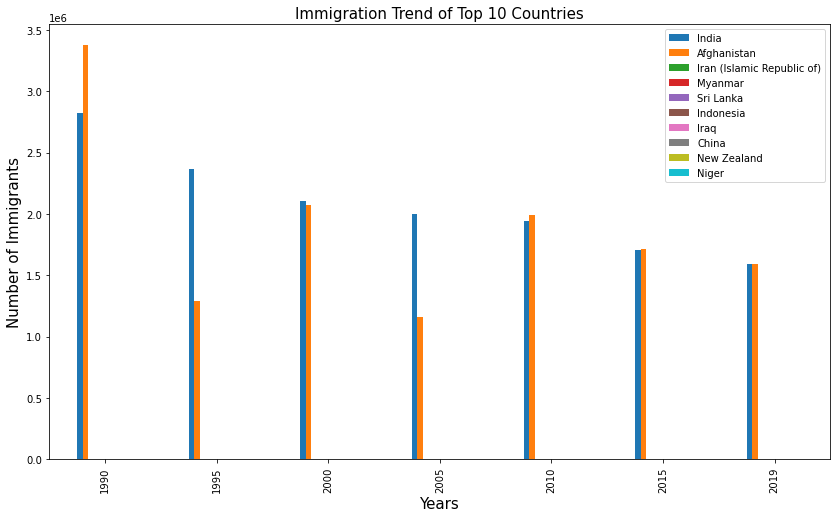

In [343]:
Top_10_Overall.plot(kind='bar', figsize=(14, 8)) # pass a tuple (x, y) size
plt.title('Immigration Trend of Top 10 Countries', size=15)
plt.ylabel('Number of Immigrants', size=15)
plt.xlabel('Years', size=15)
plt.show()

<div class="alert alert-block alert-info">
<b> Most of the immigrants are from Afghanistan and India.</div>